In [1]:
import json
import os
import shutil
import time
from base64 import b64decode
from io import BytesIO
from IPython import get_ipython
from IPython.core.magic import register_cell_magic
from skimage import data

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import PIL
import seaborn as sns
#%config InlineBackend.figure_format = 'svg'  

@register_cell_magic
def capture_png(line, cell):
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )


    out_paths = line.strip().split(' ')
    for output in result.outputs:
        display(output)
        
        data = output.data
        if 'image/png' in data:
            path = out_paths.pop(0)
            path = path.split(".png")[0] + str(time.time_ns()) + ".png"
            if not path:
                raise ValueError('Too few paths given!')
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')
            
        code =cell

        with open("imgs/napari.json", "r") as jsonFile:
            data = json.load(jsonFile)

        data[path[5:]] = code

        with open("imgs/napari.json", "w") as jsonFile:
            json.dump(data, jsonFile, indent=2)

        
temp_path = Path.cwd() / "temp_images"
temp_path.mkdir(parents=False, exist_ok=True)

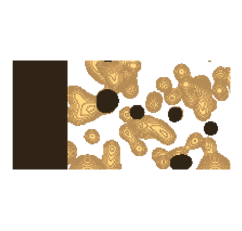

In [2]:
%%capture_png imgs/example.png
import matplotlib.pyplot as plt
import napari
import numpy as np
import scipy
from scipy import ndimage as ndi
from skimage import data
try:
    viewer
except NameError:
    viewer = napari.Viewer()
    viewer.theme = 'light'
    viewer.dims.ndisplay = 3

def make_screenshot(viewer):
    img = viewer.screenshot(canvas_only=True, flash= False)
    plt.imshow(img)
    plt.axis("off")

# make data
blobs = data.binary_blobs(length=301, volume_fraction=0.1, n_dim=3, seed=42)
blobs  = blobs[200:,200:, :-100]
blobs[:,:,:50]=1

viewer.reset_view()

viewer.layers.clear()

layer1 = viewer.add_labels(blobs, name="layer1", seed=0.03)
layer1.opacity = 1
make_screenshot(viewer)

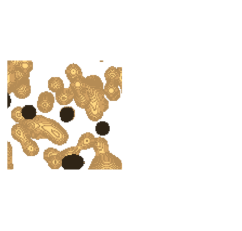

In [3]:
%%capture_png imgs/example.png
viewer.reset_view()
viewer.camera.center = (50, 50, 200)
make_screenshot(viewer)

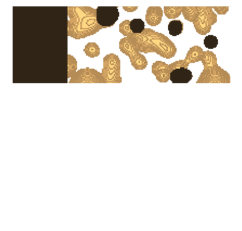

In [4]:
%%capture_png imgs/example.png
viewer.reset_view()
viewer.camera.center = (50, 130, 100)
make_screenshot(viewer)

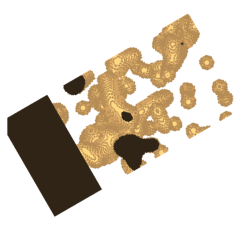

In [5]:
%%capture_png imgs/example.png
viewer.reset_view()
viewer.camera.angles = (30, 0, 0)
make_screenshot(viewer)

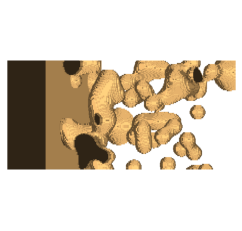

In [6]:
%%capture_png imgs/example.png
viewer.reset_view()
viewer.camera.angles = (0, 30, 0)
make_screenshot(viewer)

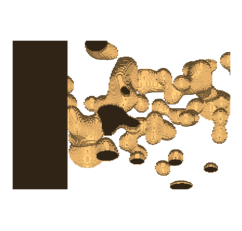

In [7]:
%%capture_png imgs/example.png
viewer.reset_view()
viewer.camera.angles = (0, 0, 30)
make_screenshot(viewer)

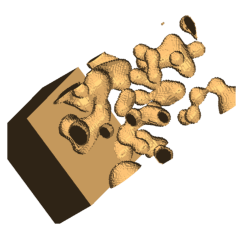

In [8]:
%%capture_png imgs/example.png
viewer.reset_view()
viewer.camera.angles = (30, 40, 80)
make_screenshot(viewer)

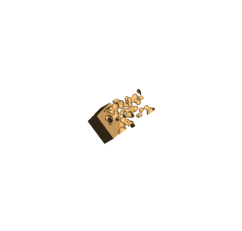

In [9]:
%%capture_png imgs/example.png
viewer.camera.zoom = 0.8
make_screenshot(viewer)

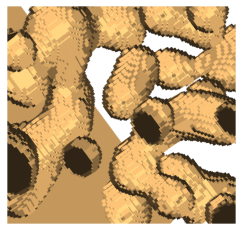

In [10]:
%%capture_png imgs/example.png
viewer.camera.zoom = 8
make_screenshot(viewer)

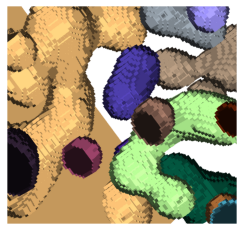

In [11]:
%%capture_png imgs/example.png
labeled = ndi.label(blobs)[0]
layer2 = viewer.add_labels(labeled, name="layer2", seed=0.03)
layer2.opacity=1
make_screenshot(viewer)


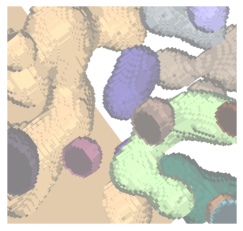

In [12]:
%%capture_png imgs/example.png
layer1.opacity = 0
layer2.opacity = 0.5
make_screenshot(viewer)

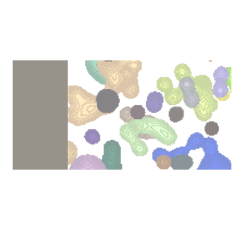

In [13]:
%%capture_png imgs/example.png
viewer.reset_view()
make_screenshot(viewer)